### The following dataset of size n = 63 provides total payment (in thousands) for all the claims of Swedish Kronor for geographical zones in Sweden. The variables are y = total payment in thousands and x = number of claims.Find the intercept, coefficient value and error term for this regression problem.How would you convey these numbers in a business context?          


In [1]:
import numpy as np
import pandas as pd
import openpyxl
import warnings as war
war.filterwarnings("ignore")

In [2]:
filePath="C:\\Users\\ASUS\\jupyterworkspace\\Assignment & Mini Project\\Module_01_Regression\\1\\Regression-Model_-Luggage-Bags-Cost-Prediction\\slr11-1.xls"
dataRead=pd.read_excel(filePath)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\jupyterworkspace\\Assignment & Mini Project\\Module_01_Regression\\1\\Regression-Model_-Luggage-Bags-Cost-Prediction\\slr11-1.xls'

In [ ]:
dataRead

In [8]:
dataRead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [9]:
dataRead.describe()

X           Y
count   63.000000   63.000000
mean    22.904762   98.187302
std     23.351946   87.327553
min      0.000000    0.000000
25%      7.500000   38.850000
50%     14.000000   73.400000
75%     29.000000  140.000000
max    124.000000  422.200000

In [10]:
X=dataRead.iloc[:,:-1].values
Y=dataRead.iloc[:,1].values

In [11]:
print(X.shape)
print(Y.shape)

(63, 1)
(63,)


In [12]:
dataRead.isnull().sum()

X    0
Y    0
dtype: int64

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Payment Sattlement')

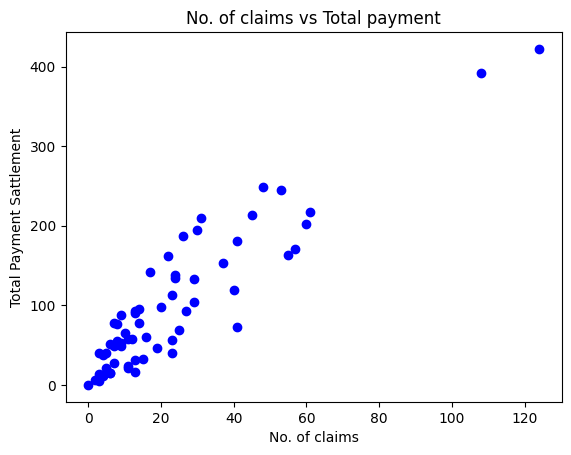

In [14]:
plt.scatter(X,Y,color="blue")
plt.title("No. of claims vs Total payment")
plt.xlabel("No. of claims")
plt.ylabel("Total Payment Sattlement")

In [15]:

# Splitting the dataset into the Training set and Test set

# splitting the data into training and testing sets is crucial for robust model evaluation,

# avoiding overfitting, and ensuring that the model generalizes well to new data.

# It's a fundamental step in the machine learning workflow.
 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

X_train

# There are 63 observations or rows in the dataset. 

# This dataset is split into two - training data and testing data.

# The ratio of split is given by the parameter test_size. 

# In this example test_size=1/6 says that 50 observations are used for training

# and rest 10 observations are used for testing.
 
# randam_state is the seed for the random number generator. 


array([[ 11],
       [ 41],
       [  7],
       [ 14],
       [  7],
       [  9],
       [ 41],
       [  8],
       [ 13],
       [ 60],
       [ 24],
       [  3],
       [ 31],
       [ 25],
       [  2],
       [  0],
       [ 57],
       [ 24],
       [  6],
       [ 29],
       [ 45],
       [ 23],
       [  7],
       [ 12],
       [  6],
       [ 53],
       [ 13],
       [ 30],
       [  4],
       [ 19],
       [ 11],
       [  8],
       [ 29],
       [ 23],
       [  3],
       [ 61],
       [ 17],
       [  9],
       [ 23],
       [ 10],
       [ 16],
       [  9],
       [124],
       [108],
       [ 15],
       [ 27],
       [ 55]], dtype=int64)

In [16]:
# Fit Simple Linear Regression to the Training dataset
from sklearn.linear_model import LinearRegression
 
# Create the model
model = LinearRegression()
 
# Train the model, using training data set
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
# The coefficients(Y=theta0+theta1 X)
 
# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [3.34113672]
Intercept = Theta0 =  19.39335680641379


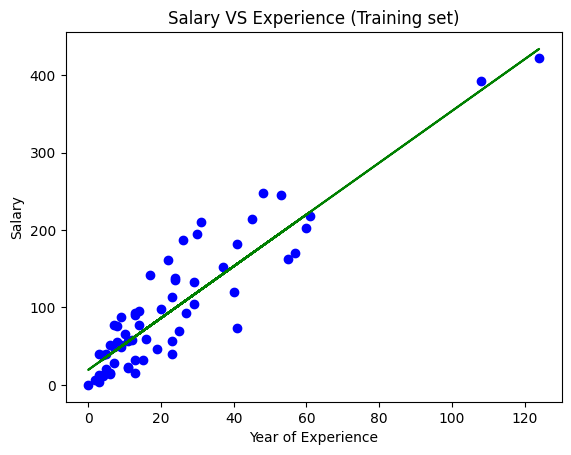

In [18]:
# Visualize the fitted regression line
 
plt.scatter(X, Y, color='blue')
Y_train_pred=model.predict(X_train)
plt.plot(X_train, Y_train_pred, color='green')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
import numpy as np
x = np.atleast_1d(50).reshape(1,1) # convert scalar to array,  rearranges the data in an ndarray into a new shape
print(x)
# -1 is a placeholder that means “adjust this dimension to make the data fit”
#reshapes the array to have one column (1), required format
# Predict the value 
y_pred = model.predict(x)
 
print('For x= 50 number of claims, predicted payment = ', y_pred)

[[50]]
For x= 50 number of claims, predicted payment =  [186.45019256]


In [20]:
# Use trained model to predict on test dataset
Y_predict = model.predict(X_test)
Y_predict

array([143.01541527,  29.41676695, 106.2629114 ,  62.8281341 ,
        39.4401771 ,  92.89836454,  32.75790367,  56.14586067,
       179.76791913,  62.8281341 ,  32.75790367,  66.16927082,
       153.03882541,  36.09904038,  86.21609111,  36.09904038])

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#Error Term (Root Mean Squared Error):
# The mean squared error
#Mean squared error regression loss
 
print("Mean squared error = %.4f" % mean_squared_error(Y_test, Y_predict))
print("Root Mean square error=%.4f"% sqrt(mean_squared_error(Y_test, Y_predict)))
 
# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.
 
print('Variance score = %.4f' % r2_score(Y_test, Y_predict))
#Rootmean squared error

# The coefficients
 
# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Mean squared error = 1499.5468
Root Mean square error=38.7240
Variance score = 0.6948
Coefficient = Theta1 =  [3.34113672]
Intercept = Theta0 =  19.39335680641379
